## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Objective](#section2)
3. [Load the packages and Data](#section3)
4. [Data Profiling](#section4)
    - 4.1 [Understanding the Dataset](#section5)<br/>
5. [Univariate/Bivariate Analysis](#section6)
   - 5.1 [Questions](#section4)
        - 5.1.1 [Off all the patients, how many survived and how many died?](#section6)<br/>
        - 5.1.2 [Who survived for 5 years or more and who died within 5 years?](#section6)<br/>
        - 5.1.3 [What is the affect of Age on Patient's health status?](#section7)<br/>
        - 5.1.4 [What is the affect of year of operation on patient's health status?](#section8)<br/>
        - 5.1.5 [What is the affect of positive-auxillary-node on Patient's health status?](#section9)<br/>
        - 5.1.6 [Draw plot on probability and cumulative distribution frequeny on Age, Year-of-operation and Positive-Auxillary-nodes](#section8)<br/>
    
   - 5.2 [Draw pair plot to know the joint relationship between 'Age','Year-of-operation',and 'Positive-auxillary-nodes'](#section10)<br/>
    -
6. [Conclusions](#section11)<br/>  

<a id=section1></a> 
## 1. Problem Statement

"This dataset contains cases from a study on the survival of patients who had underdone surgery for breast cancer."


<a id=section2></a> 
### 2. Objective:
To predict whether the patient will survive after 5 years or not based upon the patient's age , year of treatment and the number of positive auxillary nodes.

<a id=section3></a> 
### 3. Load the packages and data 

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

breast_cancer_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv")

<a id=section4></a> 
### 4. Data Profiling

<a id=section5></a> 
#### 4.1 Understanding the Dataset

To gain insights from data we will now look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [6]:
breast_cancer_data.shape

(306, 4)

breast_cancer_data has __306 rows__ and __4 columns.__

In [7]:
breast_cancer_data.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [8]:
breast_cancer_data.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
breast_cancer_data.tail()

,Age,Years_of_operation,Pos_axillary_nodes,Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [11]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [22]:
breast_cancer_data['Status'].value_counts()

1    225
2     81
Name: Status, dtype: int64

In [12]:
breast_cancer_data.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [14]:
breast_cancer_data.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

From the above output we can see that none of the __Columns__ contains __null values__. 

In [18]:
!pip install pandas_profiling

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(breast_cancer_data)
profile.to_file(outputfile="myfile.html")

<a id=section306></a> 
#### Initial observations on Breast Cancer Dataset
- Numbers of rows(training data) is: 306
- Numbers of features(columns) is: 4
- Year operation of patient show last 2 digits of years.
- This dataset contain two class(it can be said binary classification):
- Status 1 = the patient survived 5 years or longer
- Status 2 = the patient died within 5 year
- class 1's , 225 patient survived for 5 years or longer
- class 2 's, 81 patient died within 5 years
- It is Imbalance data set because class 1 has 225 data point and class 2 has 81 data point.

In [23]:
# Calculate percentage of each class
breast_cancer_data['Status'].value_counts()*100/breast_cancer_data.shape[0]

1    73.529412
2    26.470588
Name: Status, dtype: float64

#### Observation:
- 73% of Class 1 patients survived 5 years or more
- 26% of Class 2 patients dies within 5 years

<a id=section6></a> 
### Univariate Analysis:

In [25]:
survived =  breast_cancer_data.loc[breast_cancer_data['Status']== 1]
not_survived = breast_cancer_data.loc[breast_cancer_data['Status']== 2]

In [26]:
print("Patients survived 5 years or more")
survived.describe()

Patients survived 5 years or more


,Age,Years_of_operation,Pos_axillary_nodes,Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [27]:
print("Patients died within 5 years")
not_survived.describe()

Patients died within 5 years


,Age,Years_of_operation,Pos_axillary_nodes,Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#### Observations:
- Patients survived 5 years or more
   - mean = 2.791111
   - 75%(third quaartile) = 3.000000
- Patients died within 5 years
    - Mean = 7.456790
    - 75%(third quartile) = 11.000000
- Hence increase in standard deviation, so we can say patients who had more positive-auxiallary-nodes died early

<a id=section7></a> 
# 1. Age Feature
Let us do more analysis on each features.

In [28]:
survived_status = survived['Age'].describe()
not_survived_status = not_survived['Age'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
brc_age = pd.DataFrame(data={'Survived': survived_status,'Died':not_survived_status})
brc_age

,Survived,Died
count,225.000000,81.000000
mean,52.017778,53.679012
std,11.012154,10.167137
min,30.000000,34.000000
25%,43.000000,46.000000
50%,52.000000,53.000000
75%,60.000000,61.000000
max,77.000000,83.000000


#### Observations

- Mean of Died Patients roughly equal to Mean of Survived Patients
- Std of died patients roughly equal to std of survived patients
- it is not making so much clear i.e. age of patients does not effect on patient's status

In [29]:
import seaborn as sns

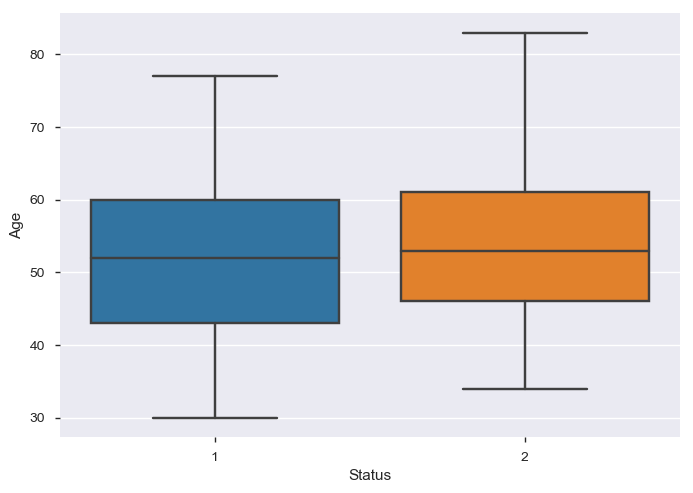

In [32]:
# draw the boxplot for age feature:
sns.boxplot(x = 'Status',y = 'Age',data = breast_cancer_data)

C:\Users\inaks\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\inaks\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


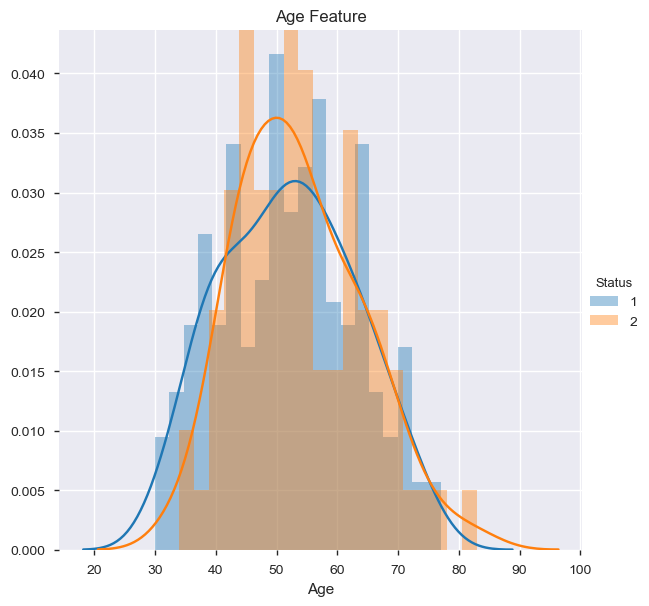

In [33]:
sns.FacetGrid(breast_cancer_data,hue = 'Status',size =6).map(sns.distplot,'Age',bins = 20).add_legend()
plt.title("Age Feature")
plt.show()

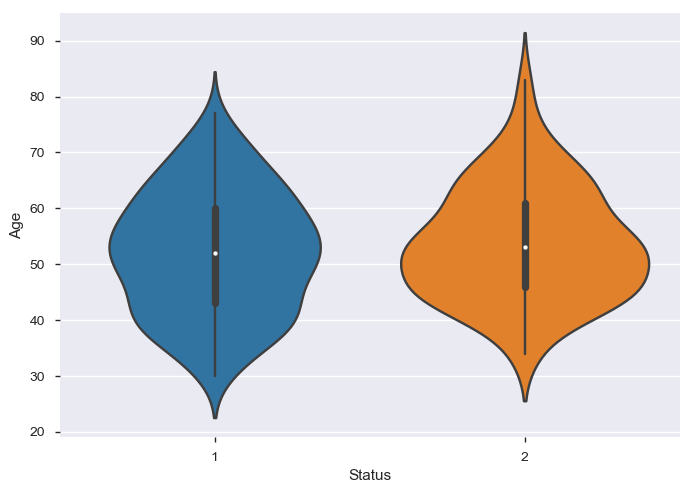

In [34]:
#draw the violin plot for age feature:
sns.violinplot(x = 'Status', y = 'Age', data = breast_cancer_data,size = 6)

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


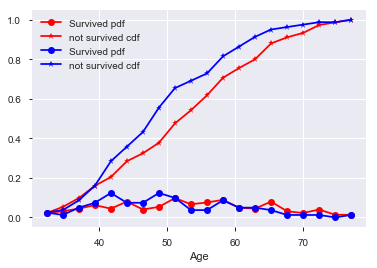

In [35]:
# now plot pdf and cdf for Age

%matplotlib inline
# pdf & cdf
# compute pdf and cdf for survived

counts, bin_edges = np.histogram(survived['Age'],bins = 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"r*-",label = "not survived cdf")

# compute pdf & cdf for not_survived 

counts,bin_edgs = np.histogram(not_survived['Age'],bins= 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'bo-',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'b*-',label = "not survived cdf")
plt.legend()
plt.xlabel("Age")

plt.show()


#### Observation
- survived and not survived patients have similar pdf and cdf i.e huge overlap
- Age feature is not relevant to determine status of patients

<a id=section8></a> 
# 2.Year-of-operation Feature

In [43]:

survived_status = survived['Years_of_operation'].describe()
not_survived_status =not_survived['Years_of_operation'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
brc_year = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})


brc_year

,Survived,Died
count,225.000000,81.000000
mean,62.862222,62.827160
std,3.222915,3.342118
min,58.000000,58.000000
25%,60.000000,59.000000
50%,63.000000,63.000000
75%,66.000000,65.000000
max,69.000000,69.000000


#### Observations
- survived and not_survived patients have similar statistics
- it does not make any sense

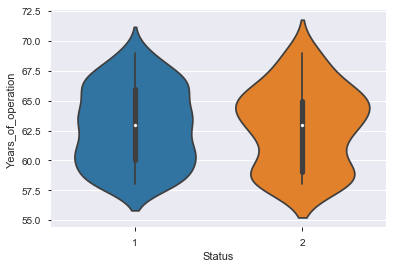

In [44]:
# Draw violin plot for year-of-opertion feature:
sns.violinplot(x = 'Status',y = 'Years_of_operation',data = breast_cancer_data)
plt.show()

C:\Users\inaks\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\inaks\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


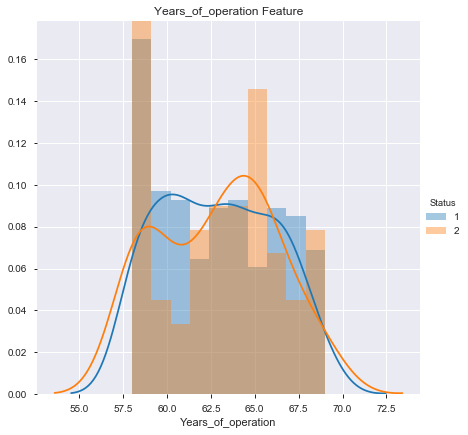

In [46]:
sns.FacetGrid(breast_cancer_data,hue = 'Status',size =6).map(sns.distplot,'Years_of_operation',bins = 10).add_legend()
plt.title("Years_of_operation Feature")
plt.show()

#### Observation
- Year of operation of patients does not classified .
- It is not useful feature to determine status of patients.

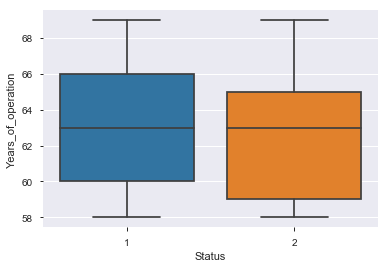

In [47]:
# draw the boxplot for year-of-operation feature:

sns.boxplot(x = 'Status',y = 'Years_of_operation',data = breast_cancer_data)


[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


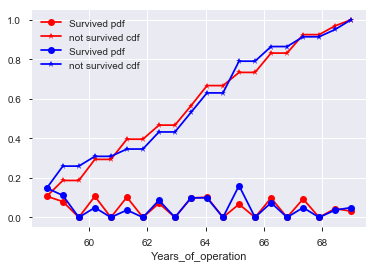

In [50]:
 #now calculate pdf & cdf for years_of_operation

%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived

counts, bin_edges = np.histogram(survived['Years_of_operation'],bins = 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"r*-",label = "not survived cdf")


# compute pdf & cdf for not_survived 

counts,bin_edgs = np.histogram(not_survived['Years_of_operation'],bins= 20,density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'bo-',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'b*-',label = "not survived cdf")
plt.legend()
plt.xlabel("Years_of_operation")

plt.show()

#### Observation
- survived and not_survived patients have similar plots and vital overlap
- It is not useful feature to determine status of patients.

<a id=section9></a> 
# 3. Positive-auxillary-nodes Feature

In [52]:
survived_status = survived['Pos_axillary_nodes'].describe()
not_survived_status =not_survived['Pos_axillary_nodes'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
brc_nodes = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})


brc_nodes

,Survived,Died
count,225.000000,81.000000
mean,2.791111,7.456790
std,5.870318,9.185654
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,4.000000
75%,3.000000,11.000000
max,46.000000,52.000000


C:\Users\inaks\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\inaks\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


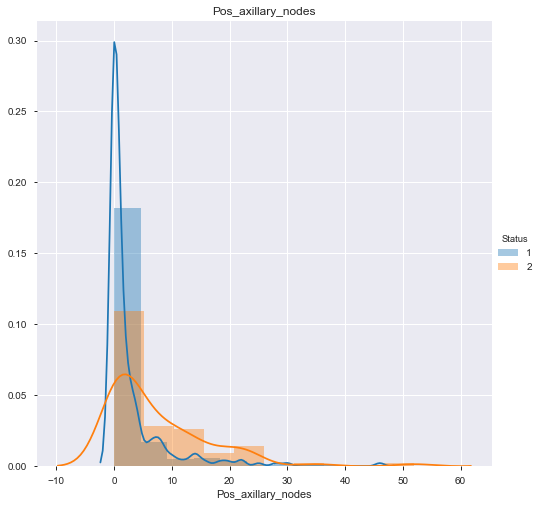

In [54]:
sns.FacetGrid(breast_cancer_data,hue = 'Status',size =7).map(sns.distplot,'Pos_axillary_nodes',bins = 10).add_legend()
plt.title("Pos_axillary_nodes")
plt.show()

#### Observation
- Most of patients have zero positive auxilary nodes
- If positive nodes is higher then there is less chance for survival
- If there is low or zero nodes then ,it is not surety that patients survived more yeras
- Patients having zero nodes died early and patients having almost 1 survived more.
- Higer positive -auxilary-nodes does not gives guarantee for more survival

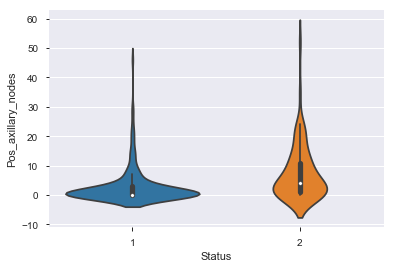

In [56]:
# draw the violinplot for Positive-auxilary-nodes

sns.violinplot(x= 'Status',y = 'Pos_axillary_nodes',data = breast_cancer_data)
plt.show()

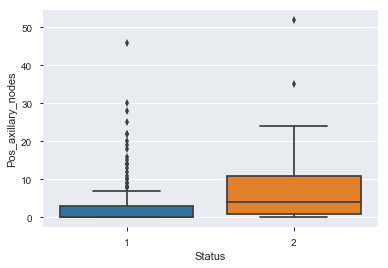

In [57]:

# draw the boxplot for Positive-auxilary-nodes

sns.boxplot(x = 'Status',y = 'Pos_axillary_nodes',data = breast_cancer_data)
plt.show()

#### Observation
- 75% of survived patients and 50% of not_survives patients have positive-auxilary-nodes < 4

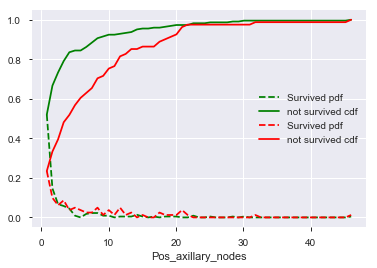

In [58]:
# now calculate the pdf & cdf for positive-auxilary nodes.

%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived

counts, bin_edges = np.histogram(survived['Pos_axillary_nodes'],bins = 55,density = True)
pdf = counts/sum(counts)
# print(pdf)
# print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"--g",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"g",label = "not survived cdf")


# compute pdf & cdf for not_survived 

counts,bin_edgs = np.histogram(not_survived['Pos_axillary_nodes'],bins= 55,density = True)
pdf = counts/sum(counts)
#print(pdf)
# print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'--r',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'r',label = "not survived cdf")
plt.legend()
plt.xlabel("Pos_axillary_nodes")

plt.show()

#### Observation
- if postive-auxilary nodes is 1 then,  we will misclassify the data roughly 50% of survived and 20% of not_survived

- if positive-auxilary node is 4 the, we will misclassify the data roughly 15% of survived and roughly 50% of not_survived

- if positive-auxilary node is 10 the, we will misclassify the data roughly 10% of survived and roughly 70% of not_survived

<a id=section10></a> 
### Bivariate Analysis

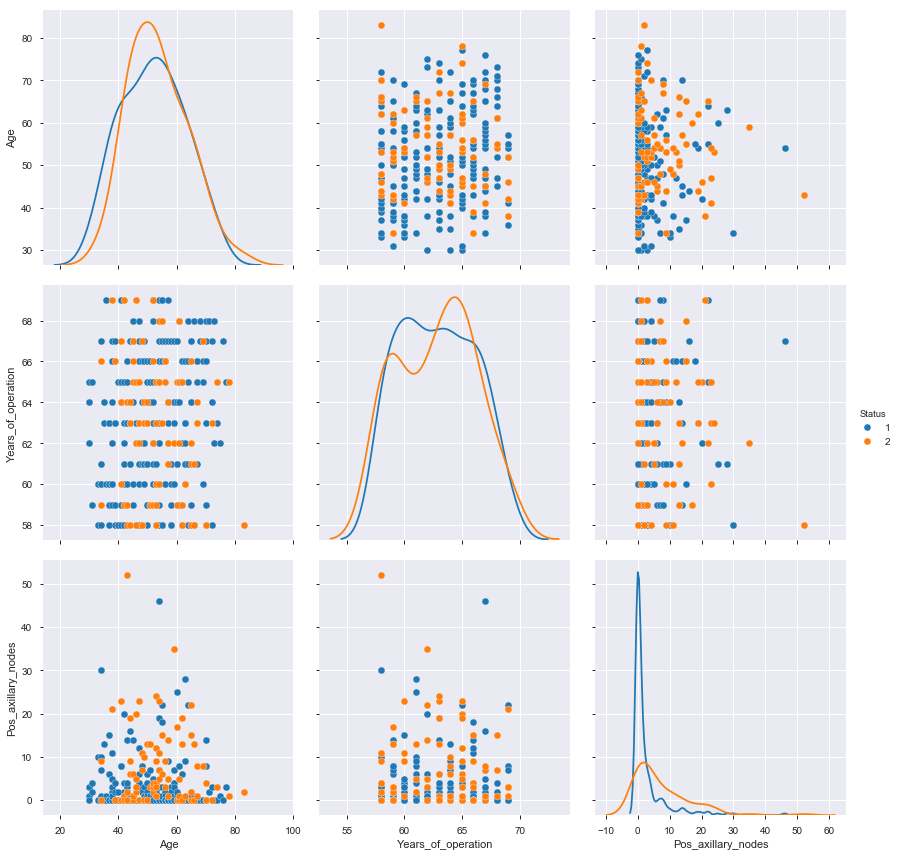

In [61]:
# plot the 3*3 grid for breast_cancer dataset


sns.pairplot(breast_cancer_data,hue = 'Status',vars = ['Age','Years_of_operation','Pos_axillary_nodes'],diag_kind = 'kde',
           size =4);
plt.show()

#### Observation
- Years_of_operation does not play any role with other features

<a id=section11></a> 
### Conclusions

- Age does not effect on survival status.
- Years_of_opeartion does not effect on survival status
- Positve -auxilary-nodes afffect on survival status
- if more numbers of Positve -auxilary-nodes deetcted then patients died within 5 years
- if less numbers of Positve -auxilary-nodes detected then patients survived for 5 years or more